# Morpion Solitaire package documentation

This notebook contains some examples on how to use the library MorpionSolitaire.py, including running a random exploration as well as importing/exporting files

First thing: import the library:

In [1]:
from MorpionSolitaire import *

## Class `Grid`

The first important class is called `Grid`

In [2]:
grid = Grid()

A grid is an array of 32 x 32 cells, each consisting in
- a point
- an horizontal line
- a vertical line
- two diagonal lines

In [3]:
grid.shape

(5, 32, 32)

The method `print()` displays the grid using `matplotlib`
(note that by default only a 20 x 20 subset of the grid is shown)

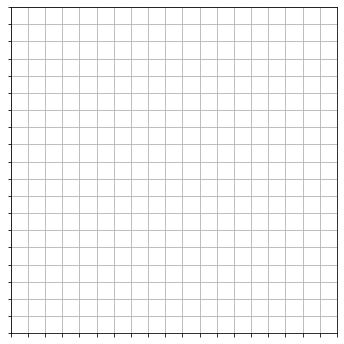

In [4]:
grid.print()

By default the constructor defines an empty grid.
But there are also some pre-defined grids that will be the starting configurations for the game

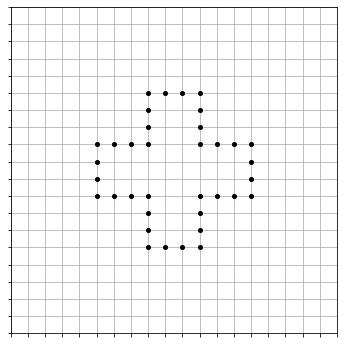

In [5]:
grid = Grid('cross')
grid.print()

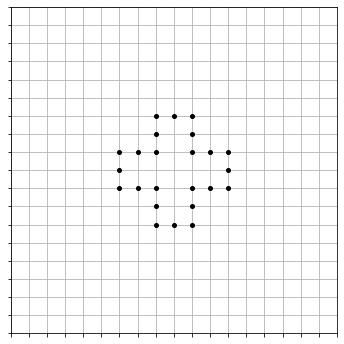

In [6]:
grid = Grid('cross4')
grid.print(view = 19)

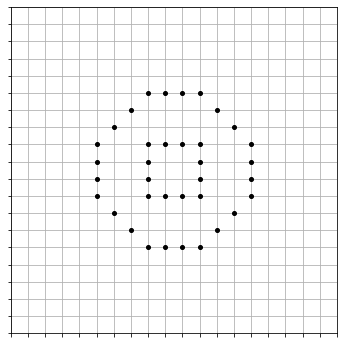

In [7]:
grid = Grid('pipe')
grid.print()

There is also the possibility to generate a random grid in which 36 points are scattered at random in a 10x10 square

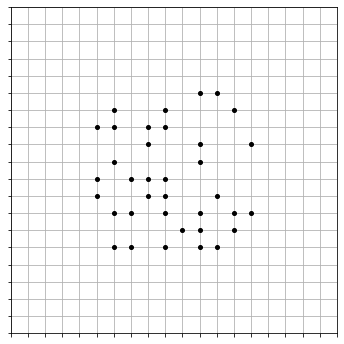

In [8]:
grid = Grid('random')
grid.print()

Note that `print()` takes various optional arguments 

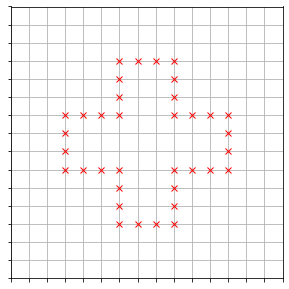

In [9]:
grid = Grid('cross')
grid.print(color='r',marker='x', markersize = 6, figsize=5, view = 16)

'Segments' can be added to a grid:

A segment is a 4-tuple `(x, y, dir, n)` where:
- `x, y` are the coordinates of the point to be added
- `dir` is the direction (see below)
- `n` indicates the position of the point on the line

In [10]:
grid.DIRECTIONS[1:5]

((1, 0), (0, 1), (1, 1), (-1, 1))

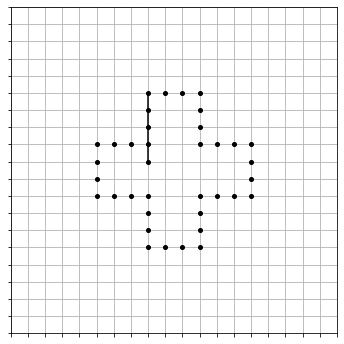

In [11]:
grid.add_segment((14, 16, 2, 0))
grid.print()

One can also ask if a move is legal:

In [12]:
grid.is_legal((13, 13, 4, 2))

True

Obviously once a move has been made it is not legal to repeat it:

In [13]:
grid.add_segment((13, 13, 4, 2))
grid.is_legal((13, 13, 4, 2))

False

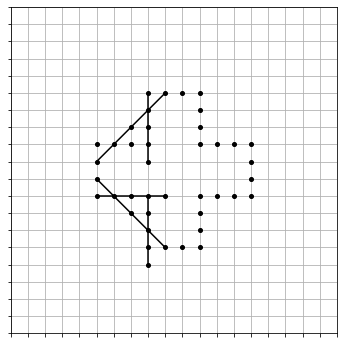

In [14]:
grid.add_segment((15, 14, 1, 4))
grid.add_segment((13, 18, 3, 2))
grid.add_segment((14, 10, 2, 0))
grid.print()

There is also a method to remove a segment:

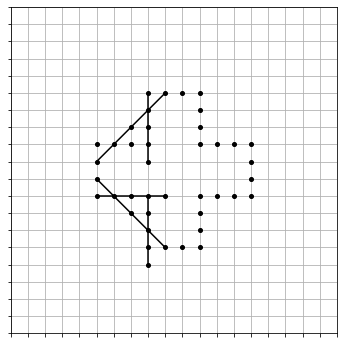

In [15]:
grid.remove_segment((8, 13, 3, 2))
grid.print()

The list of all legal moves for a given grid can be computed with `computelegalmoves`

In [16]:
len(grid.compute_legal_moves())

22

In [17]:
len(Grid('cross').compute_legal_moves())

28

In [18]:
len(Grid('pipe').compute_legal_moves())

24

## Classes `Game`, `StartingGame`, and `PlayingGame`

A `Game` is a class whose attributes are:
- a set of rules, in particular the segment length `seglen`
- a Grid `grid`
- a list of allowed moves `moves'
- a `score`

In addition it has several methods such as:
- `print()` showing the current grid together with the score and number of legal moves
- `play(fct)` that let the game evolve either until there are no more legal moves, or until a given `depth` is reached. At each turn it picks a legal move according to a function `fct`.

The class `Game` is an abstract class that should not be used directly: an exception is raised when it is instantiated. Instead, one should use one of its two child classes `StartingGame` or `PlayingGame`.

`StartingGame` can be initialized without arguments, or specifying a set of rules.
Instead, `PlayingGame` can only be initialized from an existing instance of `Game`

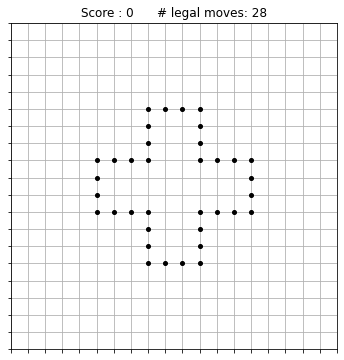

In [19]:
game = StartingGame()
game.print()

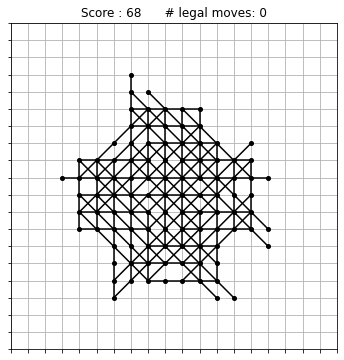

In [20]:
endgame = game.play(index = 0)
endgame.print()

**Warning**: the method `play` does not create a new grid at each step, but rather increments the existing grid, which means that the attribute `grid` of `game` is now empty:

In [26]:
game.grid == None

True

It is however possible to ask that a copy of the grid is made:

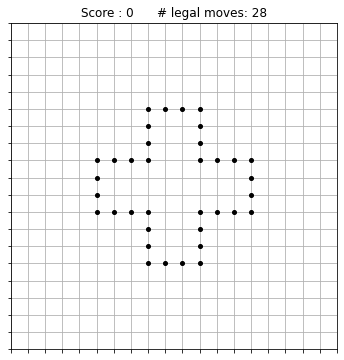

In [27]:
game = StartingGame()
endgame = game.play(index = 0, copy_grid = True)
game.print()

One can also let the game evolve until a certain score specified by the argument `depth`:

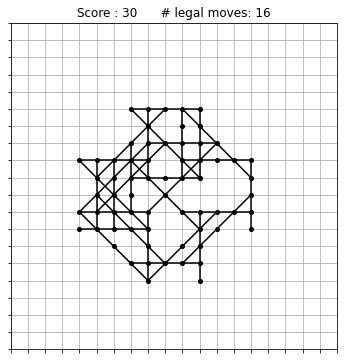

In [28]:
middlegame = game.play(index = 0, depth = 30)
middlegame.print()

Alternatively, intermediate configurations can be accessed from the end game with the method `unplay(depth)`:

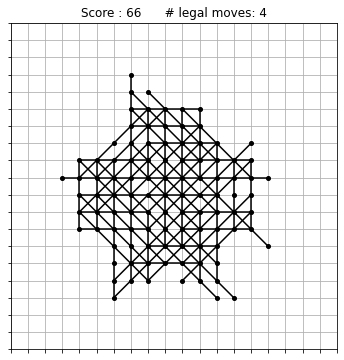

In [29]:
middlegame = endgame.unplay(2)
middlegame.print()

It is possible to perform a systematic exploration of a given game up to a given depth with the method `explore_depth`, in order to know what is the maximal number of moves allowed:

In [30]:
endgame.explore_depth(10)

0

In [31]:
StartingGame().explore_depth(10)

10

In [32]:
middlegame.explore_depth(10)

2

Legal moves can be printed with the optional argument `show_legal_moves`:

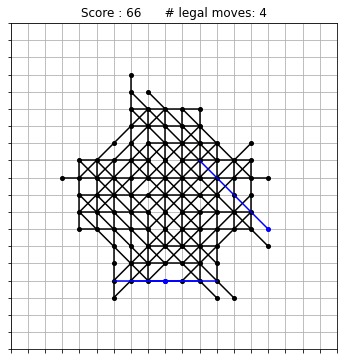

In [33]:
middlegame.print(show_legal_moves = True)

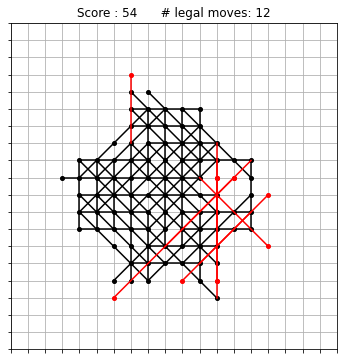

In [34]:
middlegame = middlegame.unplay(12)
middlegame.print(show_legal_moves = True, legal_moves_color = 'r')

Different playing methods give different results.
The `index` passed to the method `play` decides which move is chosen from a list of all legal moves.

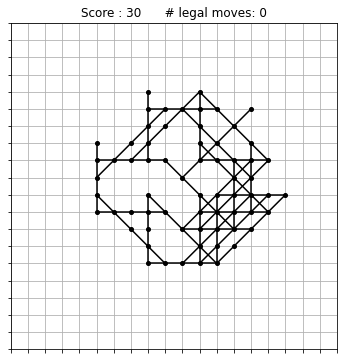

In [35]:
StartingGame().play(index = -1).print()

By default, the `play` picks a move at random at each stage:

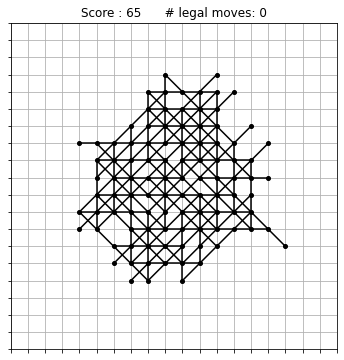

In [36]:
StartingGame().play().print()

One can also play using a model that gives a given weight to each of the legal move. The model takes as input one `grid` for each legal move, and returns an array of numbers. Typically this weight is an estimate of the number of subsequent moves.

Let us consider a toy model that returns weights at random:

In [37]:
def model(grids):
    return np.random.randint(100, size = len(grids))

The method `compute_weights` determines the weights of all legal moves:

In [38]:
StartingGame().compute_weights(model)

array([37, 15, 26, 35,  1, 65,  0, 61,  5, 87, 88, 84, 85, 43, 59, 18, 22,
       99, 70, 56, 85, 75, 77, 91, 18, 59, 63, 84])

When the game is played according to this `model`, then at each step the move with the highest weight is chosen (in this example this is still random).

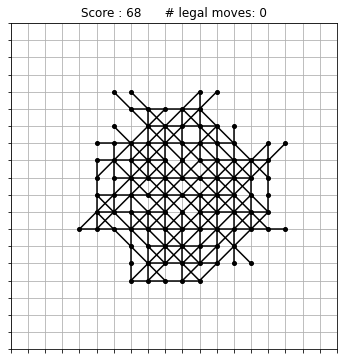

In [39]:
StartingGame().play(model = model).print()

Alternatively, it is possible to chose the move at random according to the probability distribution `exp(weight/t)`, where `t` is an optional argument of `play`:

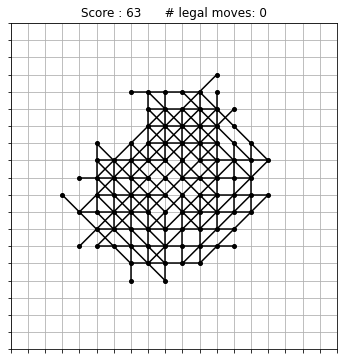

In [40]:
StartingGame().play(model = model, t = 10.0).print()

## Variations of the game rules

Different game starting with a pipe pattern:

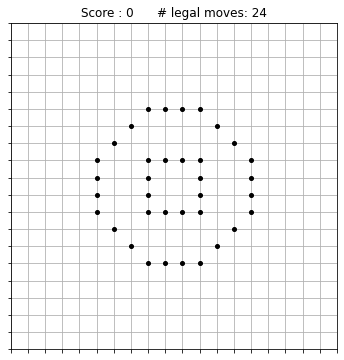

In [41]:
gamepipe = StartingGame('pipe')
gamepipe.print()

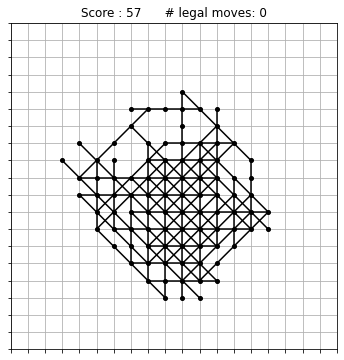

In [42]:
gamepipe.play().print()

Yet another type of game, starting with points scattered a random:

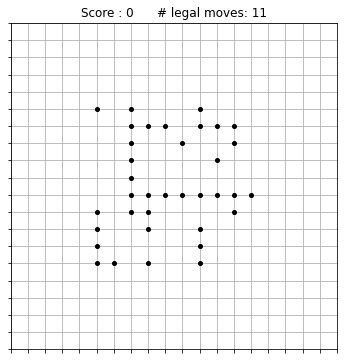

In [43]:
gamerandom = StartingGame('random')
gamerandom.print()

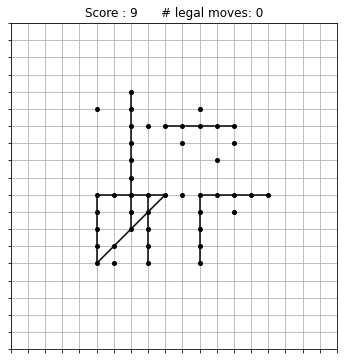

In [44]:
gamerandom.play().print()

Different rules are possible: for instance with shorter segments (3 instead of 4)

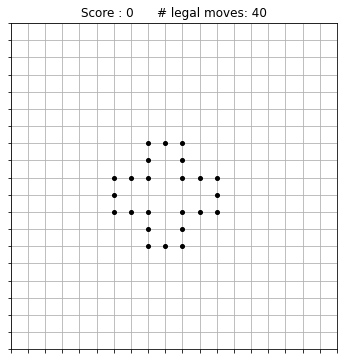

In [45]:
gamecross4 = StartingGame('cross4', seg_len = 3)
gamecross4.print()

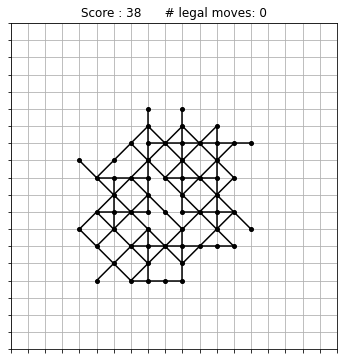

In [46]:
gamecross4.play().print()

Or one can require spacing between consecutive lines:

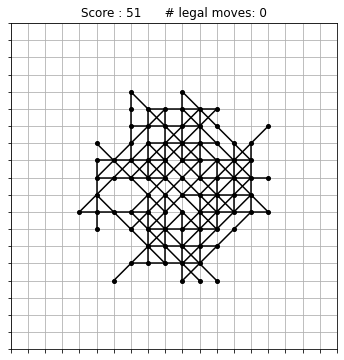

In [47]:
StartingGame('cross', touching_rule = False).play().print()

## Saving games and interactive display

A game can be saved in two different ways:
- either saving the grid using `np.save('path', game.grid)`
- or saving a list of moves that can be obtained with the method `sequence()`

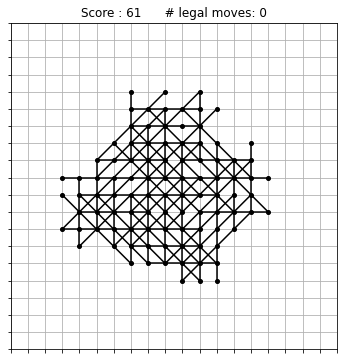

In [48]:
randomgame = StartingGame().play()
randomgame.print()

In [49]:
randomgame.sequence()

['# pattern: cross | seg_len: 4 | touching_allowed:True',
 [1, 26, (13, 20, 1, 0)],
 [2, 25, (17, 10, 2, 0)],
 [3, 24, (14, 15, 2, 4)],
 [4, 23, (13, 18, 3, 2)],
 [5, 22, (18, 18, 4, 2)],
 [6, 20, (20, 18, 2, 4)],
 [7, 19, (10, 14, 1, 0)],
 [8, 17, (18, 11, 1, 4)],
 [9, 16, (18, 13, 3, 2)],
 [10, 16, (16, 17, 1, 0)],
 [11, 13, (14, 16, 2, 1)],
 [12, 12, (13, 13, 4, 2)],
 [13, 11, (17, 21, 2, 4)],
 [14, 8, (15, 17, 1, 4)],
 [15, 7, (11, 13, 2, 0)],
 [16, 8, (15, 16, 3, 2)],
 [17, 7, (21, 14, 1, 4)],
 [18, 6, (15, 19, 3, 2)],
 [19, 4, (16, 15, 4, 1)],
 [20, 7, (15, 18, 2, 2)],
 [21, 10, (16, 18, 1, 3)],
 [22, 10, (18, 16, 4, 0)],
 [23, 10, (18, 15, 2, 1)],
 [24, 11, (19, 16, 4, 2)],
 [25, 12, (16, 13, 3, 0)],
 [26, 10, (15, 13, 1, 2)],
 [27, 6, (18, 20, 3, 4)],
 [28, 7, (17, 16, 4, 2)],
 [29, 3, (21, 16, 1, 4)],
 [30, 3, (15, 14, 4, 3)],
 [31, 5, (15, 12, 4, 2)],
 [32, 4, (13, 12, 3, 0)],
 [33, 5, (15, 15, 2, 4)],
 [34, 9, (17, 15, 1, 3)],
 [35, 9, (16, 14, 3, 1)],
 [36, 8, (16, 16, 2, 2

Finally, the method `get_grids()` returns a list of all the steps of a game, with the corresponding grids constructed (in principle only one grid is stored in memory for the whole sequence)

This can be used with widgets for an interactive display of the game:

In [50]:
import ipywidgets as widgets

steps = randomgame.games_list()

widgets.interact(lambda step, legal_moves: steps[step].print(show_legal_moves = legal_moves), 
                 step = widgets.IntSlider(min=0, max=randomgame.score, step=1, value=randomgame.score,
                                          continuous_update=False),
                 legal_moves = False);

interactive(children=(IntSlider(value=61, continuous_update=False, description='step', max=61), Checkbox(value…